# Videogame Sales
-----------------
This notebook looks at Videogame Sales from 1986 to 2015.


The data is from kaggle: https://www.kaggle.com/gregorut/videogamesales

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/oczerwia/KaggleProjects/main/vgsales.csv'
VG_data = pd.read_csv(url, error_bad_lines=False)
#VG_data = pd.read_csv(r'C:\Users\olive\Kaggle\VGSales\vgsales.csv')

In [98]:
#This will be used to translate RGB Values for better colors
def colortranslater(a,b,c):
    a = a/255
    b = b/255
    c = c/255
    return (a,b,c)


## 1. Basic Overview

In [3]:
#first look at the dataset
#you can already see the top 3 games in this timespan
#the top 10 games were all published
VG_data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
VG_data.dropna(how = "any", inplace = True)
VG_data.shape

(16291, 11)

In [5]:
VG_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
#limiting the dataset from 1986 to 2015
VG_data = VG_data[(VG_data["Year"] > 1985) & (VG_data["Year"] < 2016)]

## 2. What years were important for Video Gaming?

In [7]:
#transforming the dataset to a sum of sales per year grouped by the best genres
genre_sort = VG_data[["Platform", "Genre", "Publisher", "Global_Sales", "Year"]].groupby(by = "Genre").sum(numeric_only = True).sort_values(by = "Global_Sales", ascending = False).head()
genre_sort
genre_action = VG_data[VG_data["Genre"] == "Action"].groupby("Year").sum().loc[:,"Global_Sales"].to_frame()
genre_sports = VG_data[VG_data["Genre"] == "Sports"].groupby("Year").sum().loc[:,"Global_Sales"].to_frame()
genre_Shooter = VG_data[VG_data["Genre"] == "Shooter"].groupby("Year").sum().loc[:,"Global_Sales"].to_frame()
genre_role_playing = VG_data[VG_data["Genre"] == "Role-Playing"].groupby("Year").sum().loc[:,"Global_Sales"].to_frame()
genre_platform = VG_data[VG_data["Genre"] == "Platform"].groupby("Year").sum().loc[:,"Global_Sales"].to_frame()
genre_over_years = pd.concat([genre_action, genre_sports, genre_Shooter,genre_role_playing, genre_platform], axis=1, ignore_index=True)
genre_over_years.reset_index(inplace = True)
genre_over_years.rename(columns = {0:"Action", 1:"Sports", 2:"Shooter", 3:"Role Playing", 4:"Platform"}, inplace = True)
genre_over_years.head()

,Year,Action,Sports,Shooter,Role Playing,Platform
0,1986.0,13.74,5.57,3.89,2.52,9.39
1,1987.0,1.12,3.72,0.71,4.65,1.74
2,1988.0,1.75,3.60,0.51,5.88,27.73
3,1989.0,4.64,5.72,1.20,2.20,20.66
4,1990.0,6.39,2.11,NaN,4.52,22.97


In [99]:
plt.style.use("ggplot")
action_color = colortranslater(38, 70, 83)
sports_color = colortranslater(42, 157, 143)
shooter_color = colortranslater(233, 196, 106)
role_playing_color = colortranslater(244, 162, 97)

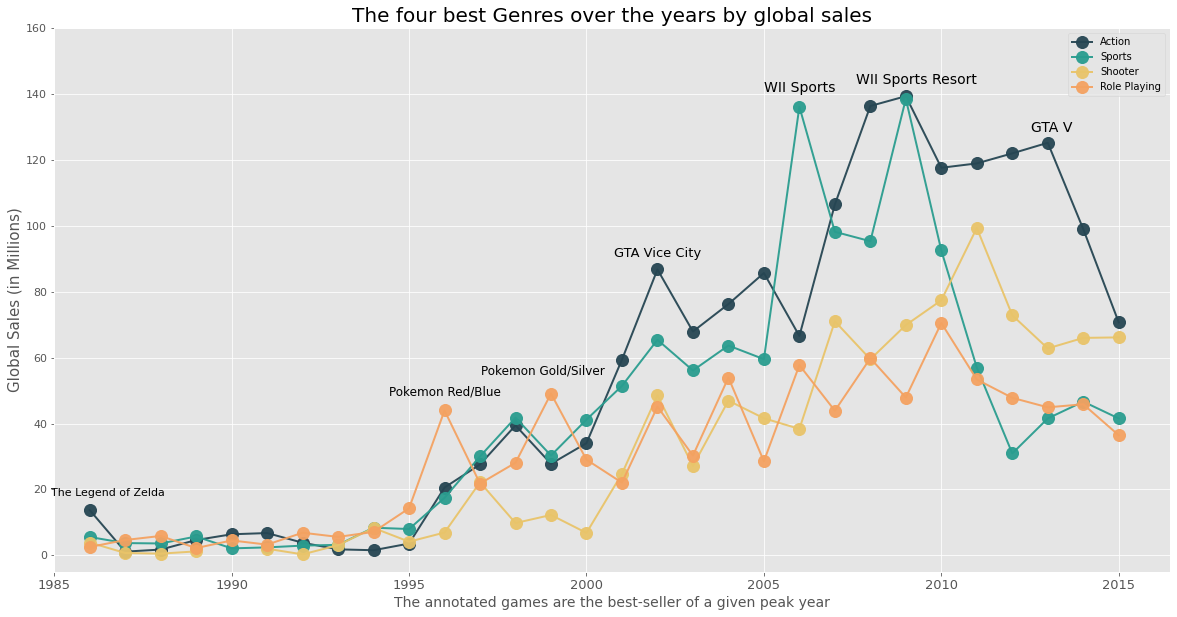

In [100]:
#plotting the above transformed dataset with some additional annotations, the color palette is from paletton.com
plt.figure(figsize = (20,10))
ax = plt.subplot(111)
action_plot = plt.plot( 'Year', 'Action',alpha = 0.95, data=genre_over_years, marker='o', markerfacecolor=action_color, markersize=12, color=action_color, linewidth=2)
sports_plot = plt.plot( 'Year', 'Sports', alpha = 0.95, data=genre_over_years, marker='o', markerfacecolor=sports_color, markersize=12, color=sports_color, linewidth=2)
shooter_plot = plt.plot( 'Year', 'Shooter', alpha = 0.95, data=genre_over_years, marker='o', markerfacecolor=shooter_color, markersize=12, color=shooter_color, linewidth=2)
role_playing_plot = plt.plot( 'Year', 'Role Playing',alpha = 0.95, data=genre_over_years, marker='o', markerfacecolor=role_playing_color, markersize=12, color=role_playing_color, linewidth=2)
#platform_plot = plt.plot( 'Year', 'Platform', data=genre_over_years, marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=2)

plt.annotate("The Legend of Zelda", (1986.5,16), textcoords="offset points", xytext=(0,7), ha='center',size = 11) 
plt.annotate("Pokemon Red/Blue", (1996,45.5), textcoords="offset points", xytext=(0,10), ha='center',size = 12) 
plt.annotate("Pokemon Gold/Silver", (1998.5,52), textcoords="offset points",xytext=(10,10), ha='center',size = 12) 
plt.annotate("GTA Vice City", (2002,87.5), textcoords="offset points", xytext=(0,10),ha='center',size = 13) 
plt.annotate("WII Sports", (2006,136), textcoords="offset points", xytext=(0,15),ha='center',size = 14) 
plt.annotate("WII Sports Resort",(2009.3,138.5), textcoords="offset points", xytext=(0,15),ha='center',size = 14) 
plt.annotate("GTA V", (2013.1,124), textcoords="offset points", xytext=(0,15),ha='center',size = 14)


plt.xlim(left=1985)
plt.ylim(-5, 160)
plt.xticks(size = 13)
plt.yticks(size = 11)
plt.ylabel("Global Sales (in Millions)", size = 15)
plt.xlabel("The annotated games are the best-seller of a given peak year", size = 14)
plt.title('The four best Genres over the years by global sales', size = 20)
plt.legend()
pass

### Insights: 
Although gaming has risen in popularity overall, the most promising genre by sales is action! 
Careful though because we can see a steep drop in sales since 2013 in almost all genres.
This could be explained due to the rising popularity of free 2 play online games! 

## 3. Which Publisher was the most succesfull? 

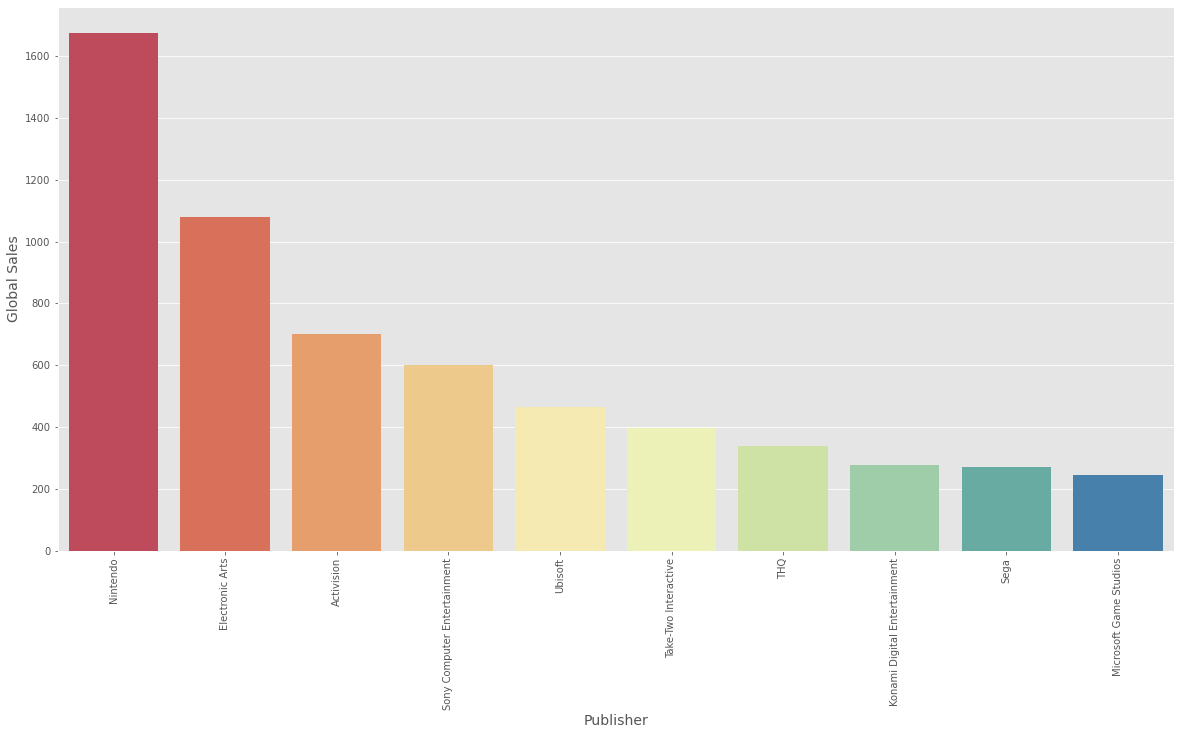

In [10]:
cum_sum_publisher_sales = VG_data[["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].groupby("Publisher").sum().sort_values(by = "Global_Sales", ascending = False).reset_index()
topten_sales = cum_sum_publisher_sales.head(10)
plt.figure(figsize = (20,10))
sns.barplot(data = topten_sales, x = "Publisher", y = "Global_Sales", palette = "Spectral") 
plt.xticks(rotation = 90)
plt.ylabel("Global Sales", size = 14)
plt.xlabel("Publisher", size = 14)
pass

## 4. Are there differences between the different markets? 

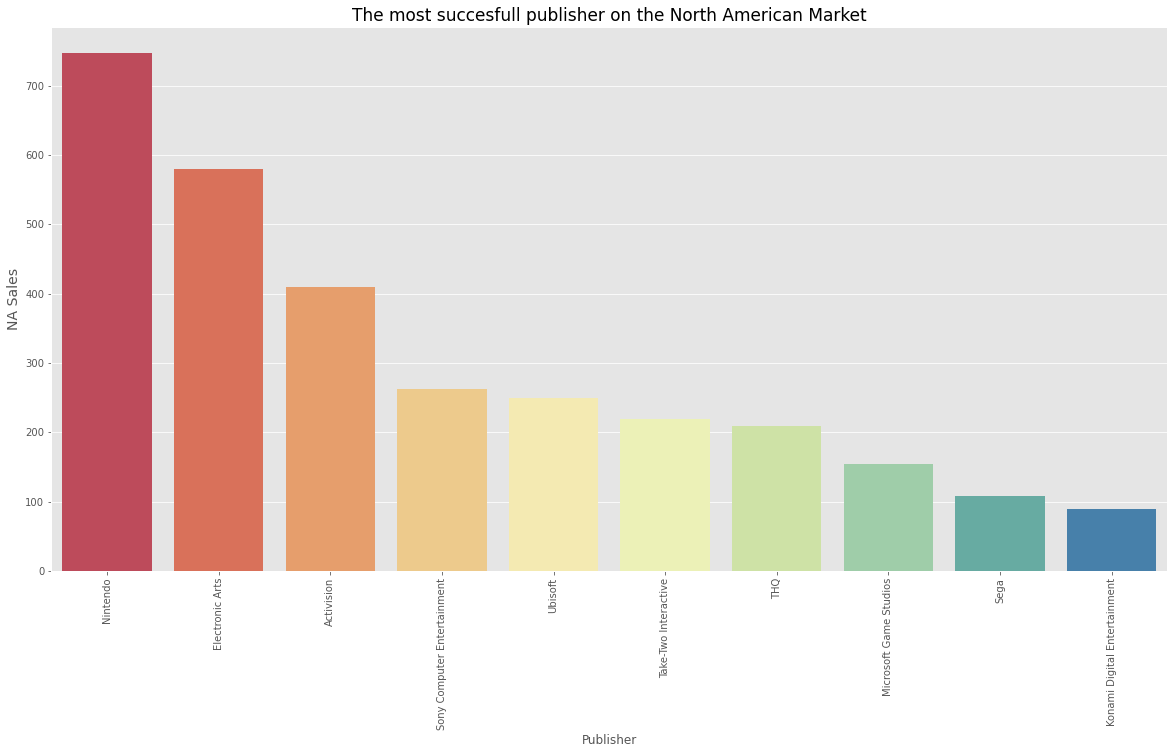

In [111]:
cum_sum_publisher_sales_NA = VG_data.groupby("Publisher").sum().sort_values(by = "NA_Sales", ascending = False).reset_index()
topten_sales_NA = cum_sum_publisher_sales_NA.head(10)
plt.figure(figsize = (20,10))
sns.barplot(data = topten_sales_NA, x = "Publisher", y = "NA_Sales", palette = "Spectral") 
plt.xticks(rotation = 90)
plt.ylabel("NA Sales", size = 14)
plt.title("The most succesful publisher on the North American Market", size = 17)
pass

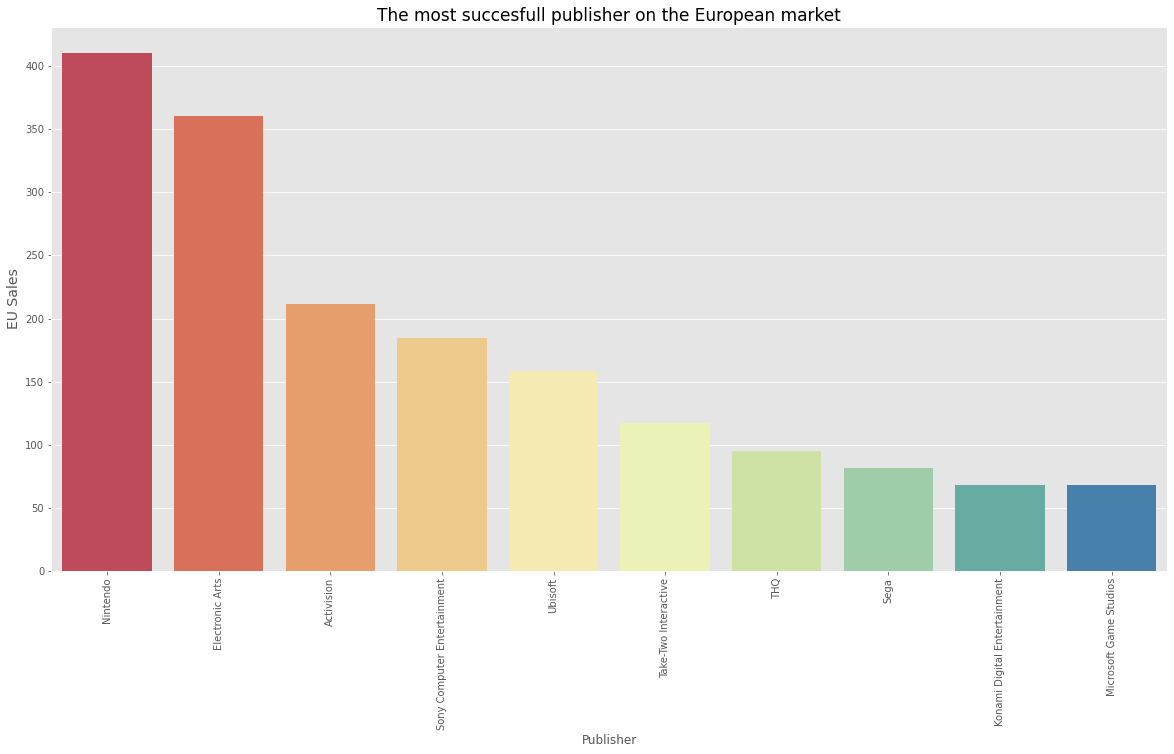

In [112]:
cum_sum_publisher_sales_EU = VG_data.groupby("Publisher").sum().sort_values(by = "EU_Sales", ascending = False).reset_index()
topten_sales_EU = cum_sum_publisher_sales_EU.head(10)
plt.figure(figsize = (20,10))
sns.barplot(data = topten_sales_EU, x = "Publisher", y = "EU_Sales", palette = "Spectral") 
plt.xticks(rotation = 90)
plt.ylabel("EU Sales", size = 14)
plt.title("The most succesful publisher on the European market", size = 17)
pass

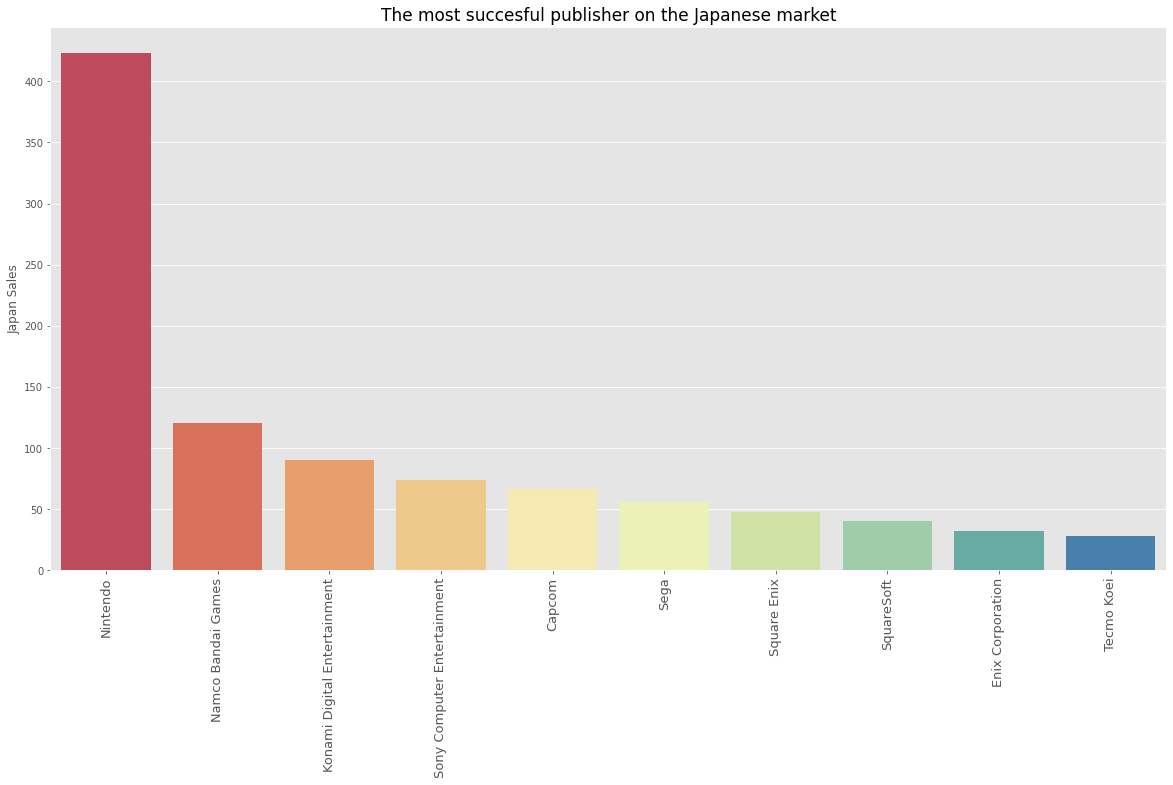

In [114]:
cum_sum_publisher_sales_JP = VG_data.groupby("Publisher").sum().sort_values(by = "JP_Sales", ascending = False).reset_index()
topten_sales_JP = cum_sum_publisher_sales_JP.head(10)
plt.figure(figsize = (20,10))
sns.barplot(data = topten_sales_JP, x = "Publisher", y = "JP_Sales", palette = "Spectral") 
plt.xticks(rotation = 90, size = 13)
plt.title("The most succesful publisher on the Japanese market", size = 17)
plt.ylabel("Japan Sales")
plt.xlabel("")
pass

In [14]:
cum_sum_publisher_sales_EUNA = pd.DataFrame()
cum_sum_publisher_sales_EUNA["Publisher"] = ["Nintendo", "Electronic Arts", "Activision", "Sony", "Ubisoft"]
cum_sum_publisher_sales_EUNA["SUM"] = cum_sum_publisher_sales_EU["EU_Sales"] + cum_sum_publisher_sales_NA["NA_Sales"]
cum_sum_publisher_sales_EUNA.head()

,Publisher,SUM
0,Nintendo,1157.64
1,Electronic Arts,941.05
2,Activision,620.73
3,Sony,447.47
4,Ubisoft,407.34


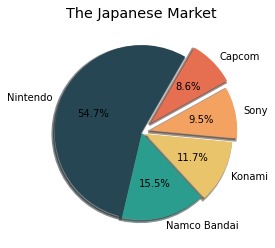

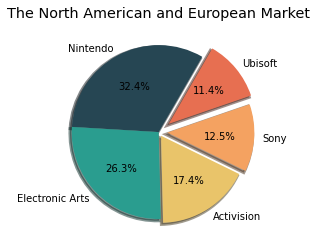

In [15]:
#piechart publisher japan
top_five_sales_JP = topten_sales_JP.head(5)
plt.figure(0)
plt.pie(x = "JP_Sales", data = top_five_sales_JP, labels = ["Nintendo", "Namco Bandai", "Konami", "Sony", "Capcom"], 
        colors =[(0.149,0.275,0.325), (0.165,0.615,0.561), (0.913,0.769,0.416), (0.957,0.635,0.38), (0.906, 0.435, 0.318)], 
        radius = 1, shadow = True, startangle = 60, explode = [0,0.01,0.05,0.1,0.15],
        autopct='%1.1f%%', wedgeprops = {'linewidth': 3})
plt.title("The Japanese Market")
plt.figure(1)
plt.pie(x = "SUM", data = cum_sum_publisher_sales_EUNA, labels = ["Nintendo","Electronic Arts", "Activision", "Sony", "Ubisoft"],
       colors = [(0.149,0.275,0.325), (0.165,0.615,0.561), (0.913,0.769,0.416), (0.957,0.635,0.38), (0.906, 0.435, 0.318)],
       radius = 1, shadow = True, startangle = 60, explode = [0,0,0.05,0.1,0.15],
    autopct='%1.1f%%', wedgeprops = {'linewidth': 3})
plt.title("The North American and European Market")
plt.show()

### Insights: 
Where as the European and North American markets are almost the same, the Japanese market shows some significant differences. 
When considering launching a new game you should defenitely remember this. 

## 5. How much impact has each market on the Global Sales? 

In [105]:
NA_color = colortranslater(7, 59, 76)
EU_color = colortranslater(17, 138, 178)
JP_color = colortranslater(6, 214, 160)
other_color = colortranslater(255, 209, 102)

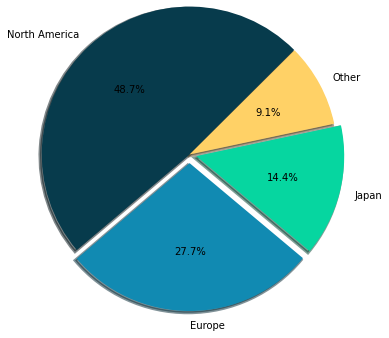

In [106]:
pie_data = VG_data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum().to_frame()
pie_data.reset_index(inplace = True)
pie_data.rename(columns = {"index":"Area", 0:"Sales"}, inplace = True)
pie_data["Sales"] = pie_data["Sales"] / 8543.63 #total Global Sales
pie_data = pie_data.loc[:3,:]
plt.pie(x = "Sales", data = pie_data, radius = 1.7, labels = ["North America","Europe", "Japan", "Other" ],
       shadow = True, labeldistance = 1.1, startangle = 45, explode =[0,0.1,0.08,0],
       colors = [NA_color,EU_color,JP_color,other_color],
       autopct='%1.1f%%', wedgeprops = {'linewidth': 3}, rotatelabels = False, normalize = False)
pass

### Insights: 
The North American market makes up almost half of the global sales! Because of that you should not underestimate the interests of american gamers!

## 6. What are the most popular Genres? 

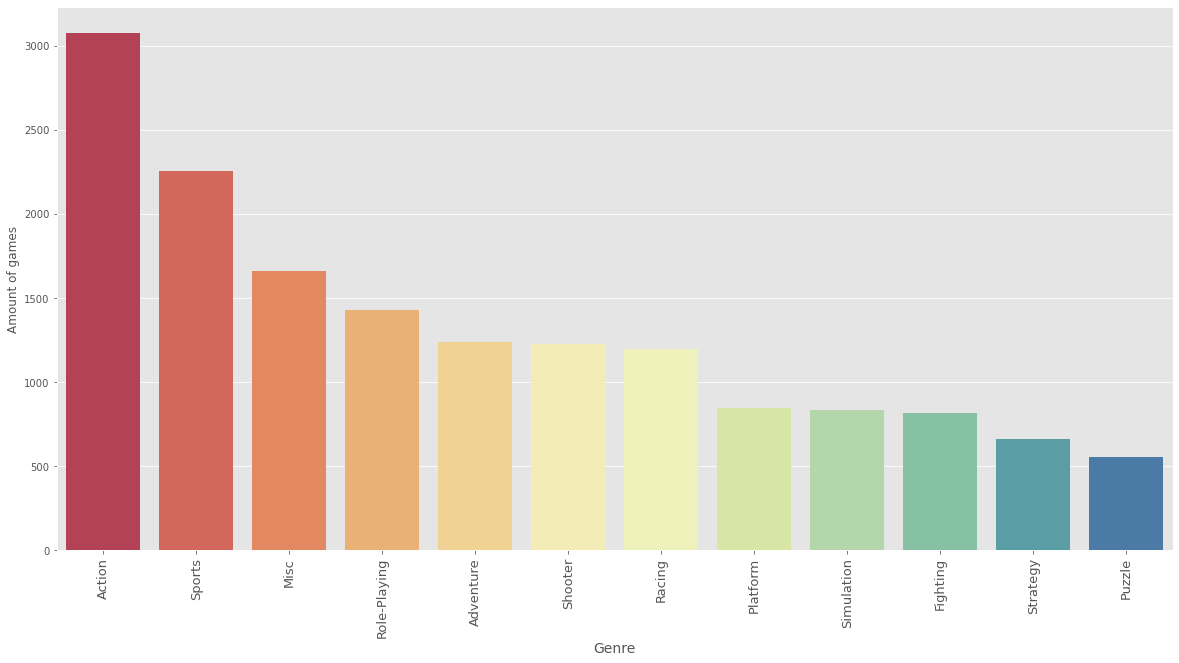

In [17]:
#histogramm x = Genre, y = count
plt.figure(figsize = (20,10))
sns.countplot(data = VG_data, x = "Genre",order = VG_data['Genre'].value_counts().index, palette = "Spectral")
plt.xticks(rotation=90)
plt.xticks(size = 13)
plt.ylabel("Amount of games")
plt.xlabel("Genre", size = 14)
pass

### Insights: 

As we already saw that Action and Sports Games are the most popular among all genres, however this was not always the case as we have seen in the first graphic! 

## 7. What were the most famous platforms? 

In [18]:
PS_games = VG_data[VG_data["Platform"] == "PS3"]
PS_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
54,55,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77


In [19]:
platforms = VG_data.groupby("Platform").sum().sort_values(by = "Global_Sales", ascending = False)
platforms[["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]].head(10)

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Platform,,,,
PS2,572.92,332.63,137.54,1233.46
X360,593.97,277.60,12.30,968.77
PS3,388.50,339.67,78.08,946.76
Wii,497.37,264.35,68.28,909.81
DS,388.26,194.05,175.00,818.60
PS,334.71,212.38,139.78,727.39
GBA,178.43,72.49,46.56,305.62
PSP,107.09,67.16,75.89,291.71
GB,113.64,47.51,85.12,254.42


### Insights: 
Even though the Wii platform is the 4th most popular console on this list, Nintendo absolutely dominates game sales. 
Wii/Nintendo Fans could be more willing to buy new/more games/consoles then others.


It is also interesting to see that of all platforms, the PS2 is the world wide most used console by video game sales! 

## 8. The great console wars! PS3 VS. Xbox360

In [20]:
#consolewars
#filtern in 2 Konsolen
wars_data = VG_data[(VG_data["Platform"] == "X360") | (VG_data["Platform"] == "PS3")]
wars_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


In [21]:
#2 separate tabellen
xbox_year = wars_data[wars_data["Platform"] == "X360"].groupby(by = "Year").sum().loc[:,"Global_Sales"].to_frame()
ps_year = wars_data[wars_data["Platform"] == "PS3"].groupby(by = "Year").sum().loc[:,"Global_Sales"].to_frame()
console_wars_data = pd.concat([xbox_year, ps_year], axis=1, ignore_index=True)
console_wars_data.reset_index(inplace = True)
console_wars_data.rename(columns = {0:"XBox", 1:"PS3"}, inplace = True)
console_wars_data.head()

,Year,XBox,PS3
0,2005.0,8.32,NaN
1,2006.0,51.88,21.07
2,2007.0,95.84,73.81
3,2008.0,135.76,119.69
4,2009.0,120.85,132.34


In [22]:
console_wars_data.iloc[0,2] = 0

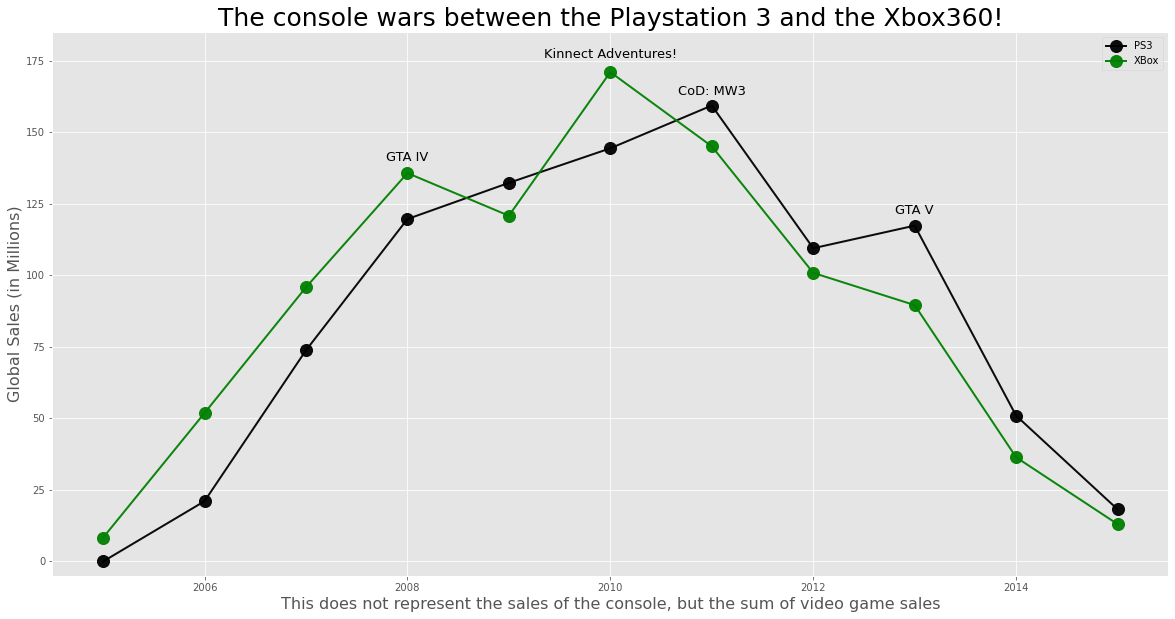

In [23]:
plt.figure(figsize = (20,10))
ax = plt.subplot(111)
plt.plot( 'Year', 'PS3',alpha = 0.95, data=console_wars_data, marker='o', markerfacecolor="black", markersize=12, color="black", linewidth=2)
plt.plot( 'Year', 'XBox',alpha = 0.95, data=console_wars_data, marker='o', markerfacecolor="green", markersize=12, color="green", linewidth=2)

plt.annotate("Kinnect Adventures!", (2010,176), textcoords="offset points", xytext=(0,0), ha='center',size = 13) 
plt.annotate("GTA IV", (2008,140), textcoords="offset points", xytext=(0,0), ha='center',size = 13) 
plt.annotate("CoD: MW3", (2011,163), textcoords="offset points", xytext=(0,0), ha='center',size = 13) 
plt.annotate("GTA V", (2013,121.5), textcoords="offset points", xytext=(0,0), ha='center',size = 13) 

plt.ylim(-5, 185)
#plt.fill_between(x = console_wars_data["Year"], y1 = console_wars_data["PS3"], y2 = console_wars_data["XBox"], color = "White")
plt.legend()
plt.xlabel("This does not represent the sales of the console, but the sum of video game sales", size = 16)
plt.ylabel("Global Sales (in Millions)", size = 16)
plt.title("The console wars between the Playstation 3 and the Xbox360!", size = 25)
pass

### Insights: 

We already know that the Xbox360 won over the PS3. As we can see in this graph, the PS3 finished stronger, whereas the Xbox360 had an overall better start on the global market!

### 9. What were the best genres across famous platforms? 

In [24]:
best_consoles = platforms.head()
best_consoles

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
PS2,15917620,4263750.0,572.92,332.63,137.54,190.47,1233.46
X360,8099279,2464063.0,593.97,277.60,12.30,84.60,968.77
PS3,8429687,2557597.0,388.50,339.67,78.08,140.59,946.76
Wii,9929663,2591562.0,497.37,264.35,68.28,79.20,909.81
DS,20438941,4275464.0,388.26,194.05,175.00,60.27,818.60


In [73]:
VG_data_genre_platform = VG_data[(VG_data["Platform"] == "Wii") |(VG_data["Platform"] == "X360") | (VG_data["Platform"] == "PS2")]
VG_data_genre_platform = VG_data_genre_platform[(VG_data_genre_platform["Genre"] == "Action")|(VG_data_genre_platform["Genre"] == "Sports")|
                                                (VG_data_genre_platform["Genre"] == "Misc")|(VG_data_genre_platform["Genre"] == "Role-Playing")
                                                |(VG_data_genre_platform["Genre"] == "Adventure")]
VG_data_genre_platform.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [57]:
pv_table = pd.pivot_table(data = VG_data_genre_platform, values = "Global_Sales", columns = "Platform",index = "Genre", aggfunc = np.sum)
pv_table

Platform,PS2,Wii,X360
Genre,,,
Action,272.43,110.48,239.19
Adventure,21.16,18.33,15.23
Fighting,89.19,23.82,37.64
Misc,98.69,217.43,89.33
Platform,72.11,90.68,11.39
Puzzle,5.90,15.63,0.71
Racing,154.21,61.24,65.13
Role-Playing,91.55,14.06,71.97
Shooter,108.28,26.34,277.21


In [86]:
color_a = colortranslater(0, 48, 73)
color_b = colortranslater(214, 40, 40)
color_c = colortranslater(247, 127, 0)
color_d = colortranslater(252, 191, 73)
color_e = colortranslater(234, 226, 183)

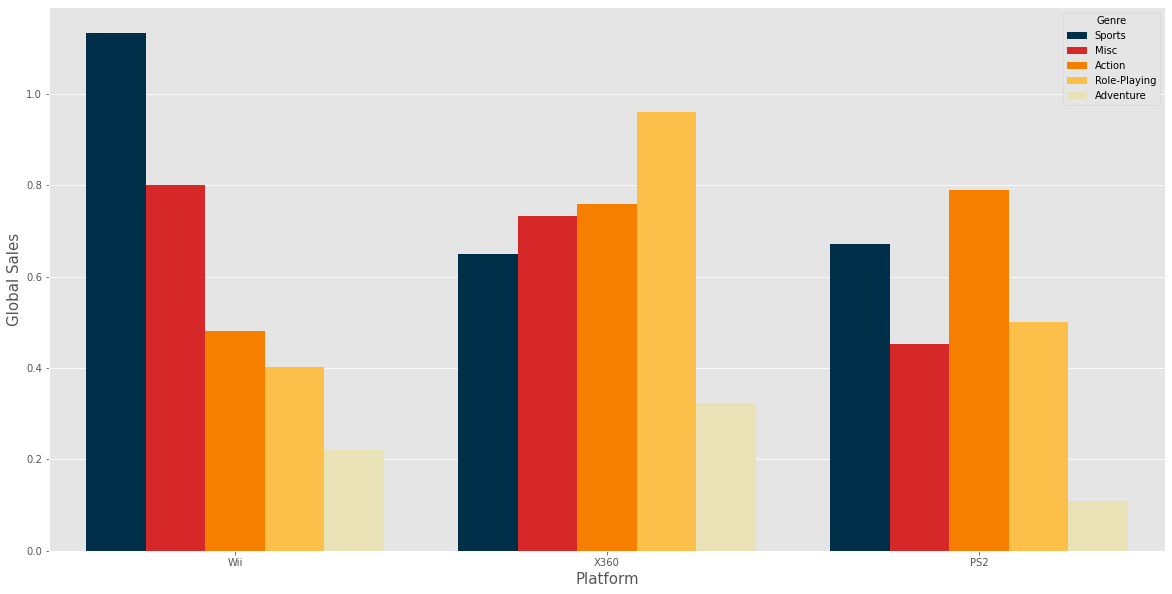

In [110]:
plt.figure(figsize = (20,10))
sns.barplot(data = VG_data_genre_platform, x = "Platform", y = "Global_Sales", hue = "Genre", ci = 0, 
           palette = [color_a,color_b,color_c,color_d,color_e], saturation = 1)

plt.ylabel("Global Sales", size = 15)
plt.xlabel("Platform", size = 15)
plt.show()